In [3]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

     |████████████████████████████████| 41 kB 471 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=e5e08a0a7ae8776ecd261e11a2b51c604048c161befcd7e93e74995c8c2f6fc0
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [4]:
# 필요한 패키지/모듈 가져오기

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import warnings 
warnings.filterwarnings('ignore')

In [5]:

# Google Drive Mount

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/3주차/최종

/content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/3주차/최종


In [7]:
%ls

 divorce_fa.csv
'[컨디션난조 분위기고조] week3_pca&fa_데이터.csv'
'[컨디션난조 분위기고조] week3_pca&fa_보고서.docx'
'[컨디션난조 분위기고조] week3_pca&fa_코드.ipynb'
'[컨디션난조 분위기고조] week4_Clustering_ㅅㅇ.ipynb'
'[컨디션난조 분위기고조] week4_Clustering_코드_수진.ipynb'
'[컨디션난조 분위기고조] week4_Clustering_코드.ipynb'


In [ ]:
df = pd.read_csv('./[컨디션난조 분위기고조] week3_pca&fa_데이터.csv',sep = ';')

This dataset contains data about 150 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy.
The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).


이 데이터는 Gottman couples therapy를 기반으로 150커플의 이혼 예측 변수(DPS) 설문 결과를 포함한다. 설문 대상은 터키의 다양한 지역에서 온 커플들이며 이미 이혼했거나, 결혼상태인 커플들에게 대면 인터뷰를 진행하였다. 모든 응답은 0~4로 총 다섯 단계(0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always)로 구성되어 있다.

In [ ]:
df.dtypes

Q1         int64
Q2         int64
Q3         int64
Q4         int64
Q5         int64
Q6         int64
Q7         int64
Q8         int64
Q9         int64
Q10        int64
Q11        int64
Q12        int64
Q13        int64
Q14        int64
Q15        int64
Q16        int64
Q17        int64
Q18        int64
Q19        int64
Q20        int64
Q21        int64
Q22        int64
Q23        int64
Q24        int64
Q25        int64
Q26        int64
Q27        int64
Q28        int64
Q29        int64
Q30        int64
Q31        int64
Q32        int64
Q33        int64
Q34        int64
Q35        int64
Q36        int64
Q37        int64
Q38        int64
Q39        int64
Q40        int64
Q41        int64
Q42        int64
Q43        int64
Q44        int64
Q45        int64
Q46        int64
Q47        int64
Q48        int64
Q49        int64
Q50        int64
Q51        int64
Q52        int64
Q53        int64
Q54        int64
Divorce    int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [ ]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


# 2. EDA

In [ ]:
df.columns[:-1]

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54'],
      dtype='object')

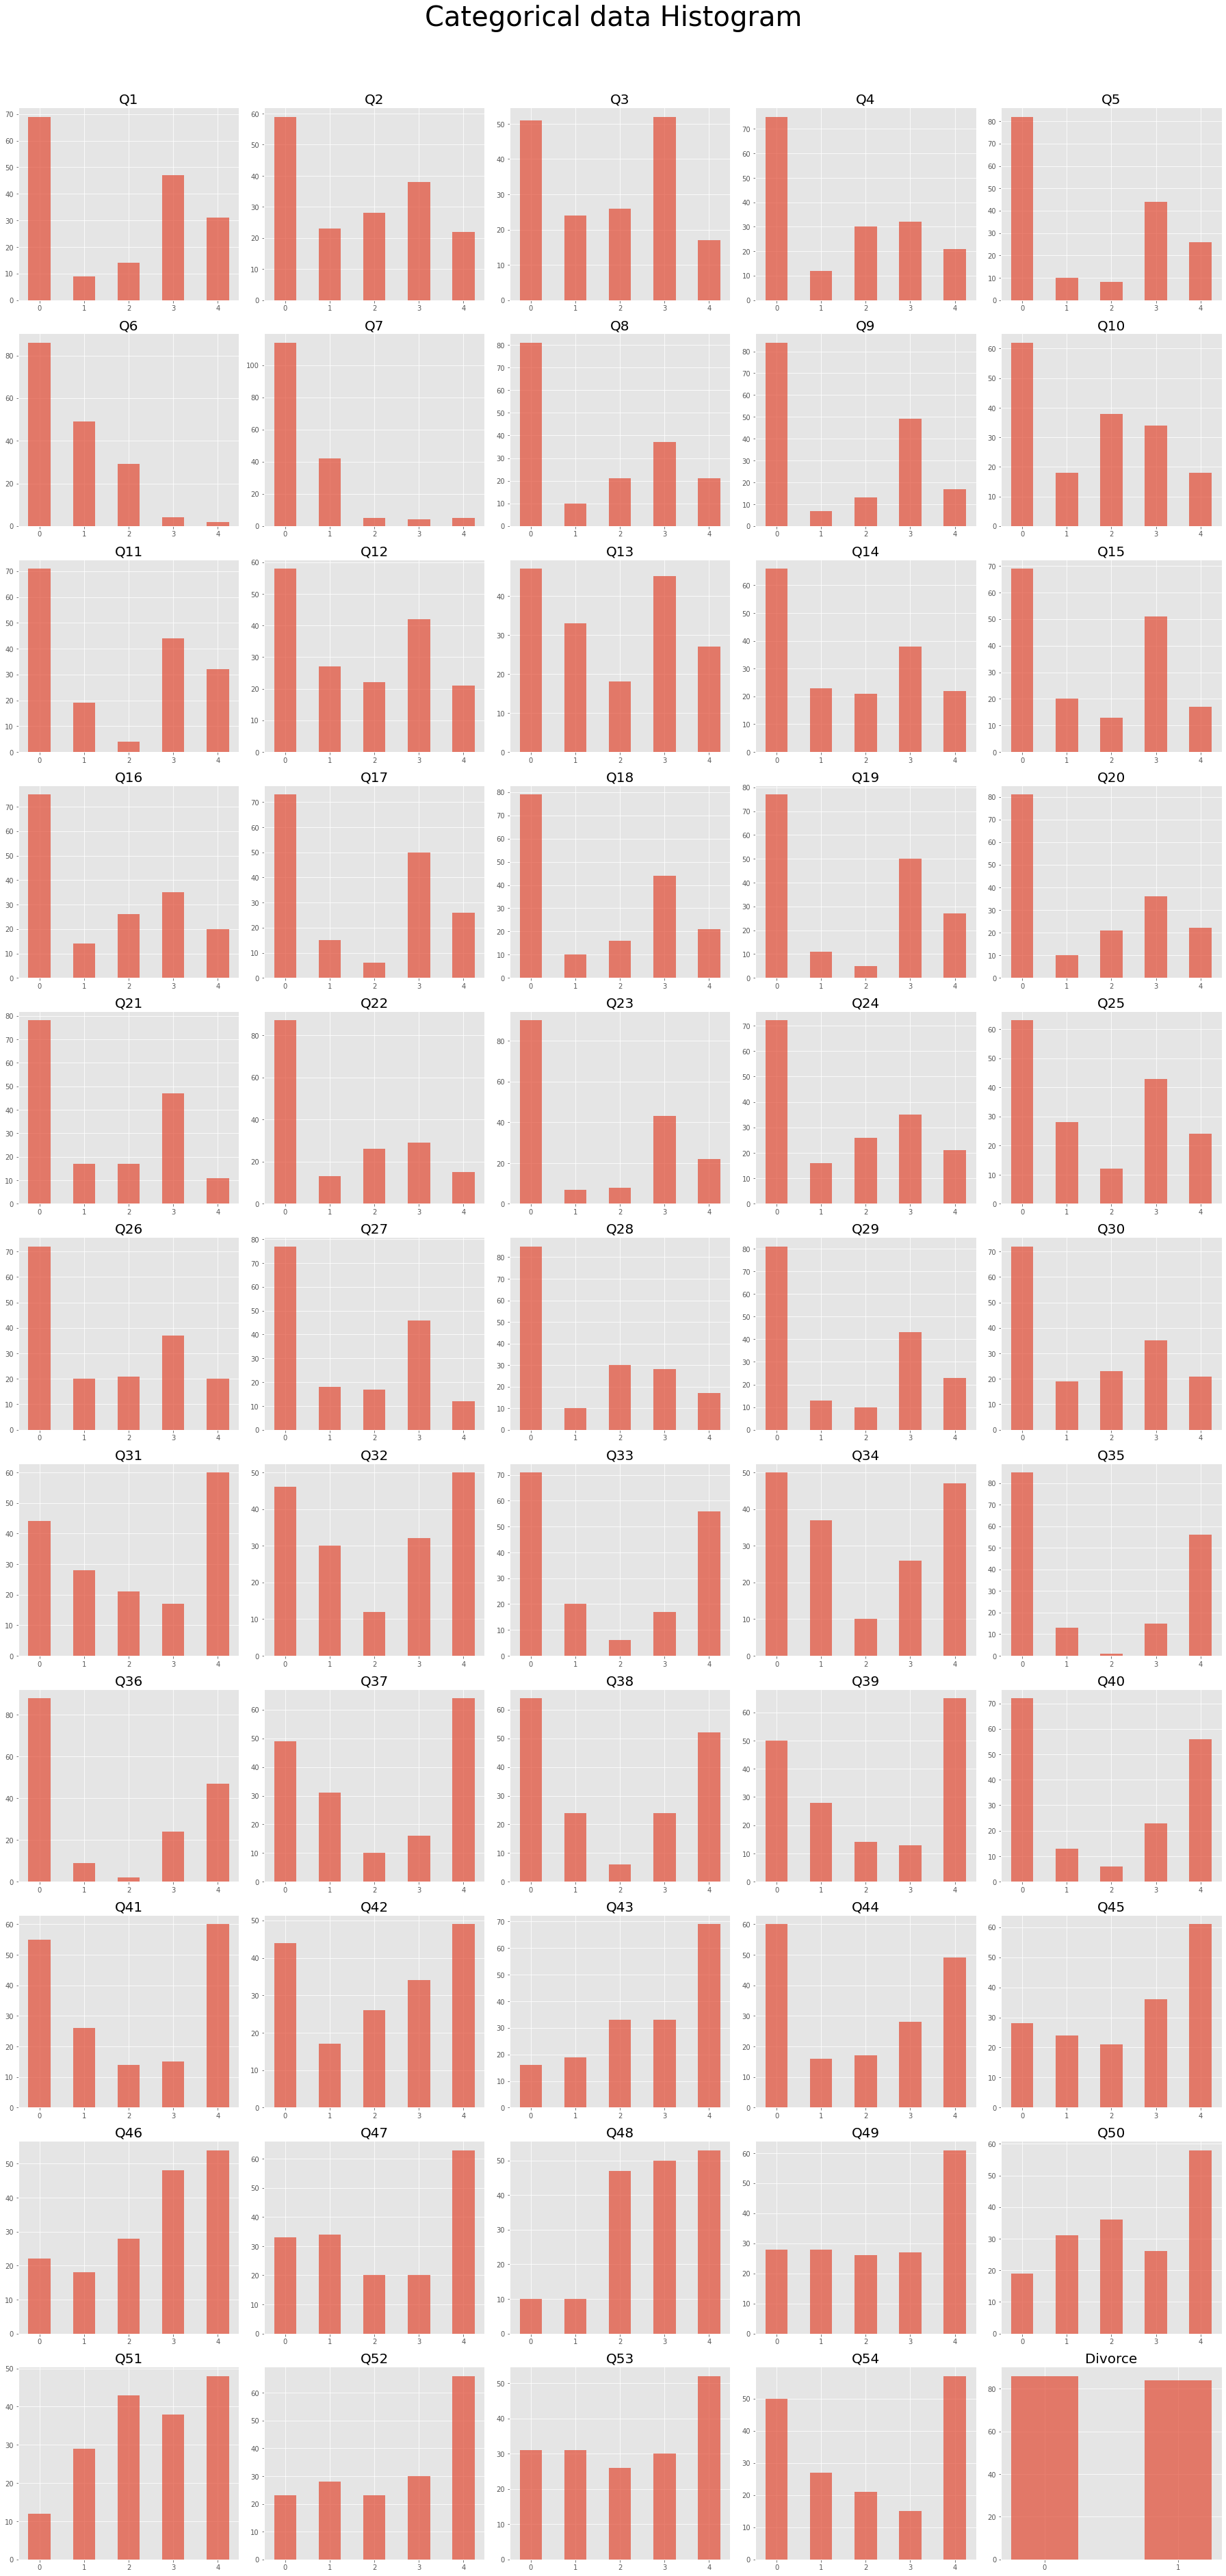

In [ ]:
plt.style.use("ggplot")

# 히스토그램을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,55))
plt.suptitle("Categorical data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = df.columns
for i in range(0, len(cols)):
    plt.subplot(11, 5,i+1)
    plt.title(cols[i], fontsize=20)
    temp = df[cols[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
    plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
df.value_counts('Divorce')

Divorce
0    86
1    84
dtype: int64

In [ ]:
df[df.columns[:-1]]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,4,2,2,2
166,0,0,0,0,0,0,0,0,0,0,...,3,4,1,2,2,2,2,3,2,2
167,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
168,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


# 3. FA

## Step 1. 전제조건 확인

탐색적 요인 분석을 진행하기 전, 실습에 활용되는 데이터가 탐색적 요인 분석의 전제조건을 만족하는지에 대한 확인이 선행되어야한다. 탐색적 요인 분석의 전제조건은 다음과 같다.

1. 변수: 등간척도/비율척도로 측정한 양적 변수이다.
2. 관찰치: 정규분포이며 상호 독립이어야 하며, 변수별 분산이 동일해야 한다.
3. 모상관 행렬이 단위 행렬이라는 가설이 기각되어야 한다. (KMO/Bartlett 검정)
4. 변수 간 일정 수준 이상의 상관관계가 존재해야 한다.



조건 1은 해당 데이터가 설문 결과로 생성된 데이터로 모든 응답이 0,1,2,3,4 중 하나이며 등간 숫자로 이루어졌다는 점에서 만족했다고 볼 수 있다. 조건 2의 경우, PCA를 진행하기 전 데이터를 Standard Scaling을 거침으로써 만족하였다고 볼 수 있다. 조건 3의 만족 여부의 경우, Bartlett Test의 기각과 KMO Test를 통해 확인할 수 있다.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

Bartlett Test는 모집단으로부터 추출한 표본의 상관계수 행렬의 행렬식 값을 계산하여 상관계수 행렬이 단위행렬인지 아닌지를 카이제곱 분포를 이용해 검정하는 방법이다. Bartlett Test를 실행하였을 때, 결과 값으로 P-Value가 0.0으로 나온 것을 확인하였다. 유의수준을 0.05로 설정하였다는 가정 하에 귀무가설이 기각되므로 조건 2를 만족하는 것으로 보인다

In [ ]:
chi_square_value, p_value = calculate_bartlett_sphericity(x_scaled)
chi_square_value, p_value

(17654.270924632445, 0.0)

KMO Test(Kaiser-Meyer-Olkin Test)는 입력변수들 간의 상관계수 제곱들과 편상관계수 제곱들을 모두 더한 값 중에서 상관계수 제곱의 합이 차지하는 비율 값을 KMO 값이라 하고, 이 값이 클수록 요인분석에 적합하다. 일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋다고 판단한다. KMO Test를 실행하였을 때, 결과 값이 0.9 이상으로 요인 분석을 위한 변수들의 선정이 아주 좋은 것으로 나와 KMO Test 결과에서도 조건 2를 만족하는 것을 볼 수 있다.

In [ ]:
kmo_all, kmo_model = calculate_kmo(x_scaled)
kmo_model

0.9639648508490809

변수 간의 상관관계를 heatmap으로 확인하였을 때, 대부분 양수, 0.5 이상의 상관관계를 보이므로 조건 4를 만족한다고 볼 수 있다.


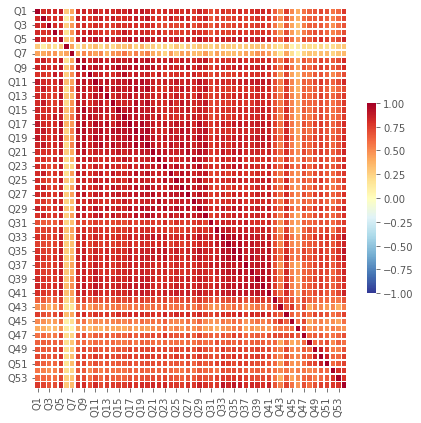

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(x_scaled.corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## Step 2. Factor 개수 선택

PCA과정과 동일하게 Eigen value가 1 이상일 때 까지 또는, 그래프기울기가 완만해지기 전까지를 기준으로 factor개수를 선택하였다. 따라서 본 실습과정에서는 3개의 factors 선택하여 factor analysis를 진행하였다.

## Step 3. Factor Rotation

다음으로는 factor수를 3로 지정하고 다양한 방법으로 factor analysis를 진행하였다. No Rotation을 기준으로 여러 회전 방법을 시도하여 비교해 보았다.

FA에서의 요인 적재량은 각 변수와 요인 간의 관계를 나타내는 값으로 Stevens JP (1992) Applied multivariate statistics for the social sciences (2nd edition)에 따르면 0.4이상일때 유의미하다고 이야기할 수 있다. 이를 더 눈에 띄게 쉽게 확인하기 위해, heatmap으로도 시각화하였다.

https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/thresholds

### No Rotation

먼저 Rotation을 거치지 않고 요인 분석을 진행하였다. Factor의 개수를 앞선 과정에서 구한 3개로 지정하고 진행하였다. 이때의 설명가능한 누적 분산은 0.797로 나타났다.


In [ ]:
# factor 3개로 선택 no rotation
fa_no = FactorAnalyzer(n_factors=3, rotation = None)
fa_no.fit(x_scaled)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [ ]:
fa_result_loading_no = pd.DataFrame(fa_no.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3'],
                                       index=x_scaled.columns)
fa_result_loading_no

,Factor1,Factor2,Factor3
Q1,0.886223,-0.147789,-0.000710
Q2,0.865924,-0.181749,0.134341
Q3,0.820723,-0.232283,-0.043637
Q4,0.851173,-0.210988,-0.001868
Q5,0.949860,-0.002566,-0.003942
Q6,0.300747,-0.061057,-0.144759
Q7,0.459262,-0.341734,-0.032246
Q8,0.919312,-0.113230,0.113872
Q9,0.943922,-0.110473,0.054583
Q10,0.868219,-0.262510,0.039417


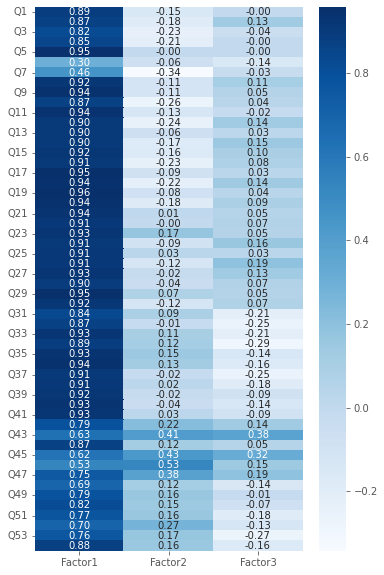

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_no, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa_no.get_factor_variance()
fa_result_fromLoading_no = pd.DataFrame(fa_no.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading_no.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading_no

,Factor1,Factor2,Factor3
SS Loadings,40.008271,1.862519,1.169785
Proportion Var,0.740894,0.034491,0.021663
Cumulative Var,0.740894,0.775385,0.797048


### Orthogonal Rotation: Varimax

Orthogonal Rotation은 각각의 좌표축 간의 각도를 정확히 직각으로 유지하여 Rotation을 거친다. 그럼으로써, 회전된 인자들이 서로 상관되지 않도록 제약된다. Varimax는 이러한 Orthogonal Rotation의 한 종류로, 요인행렬을 변환할 때 행렬의 열(요인)을 기준으로 하여 큰 값은 더 크게, 작은 값은 더 작게 회전하는 길을 찾고 한 공통인자에 대해 각 요인이 가지는 인자적재값 제곱의 분산이 최대가 되도록 변환하는 방법이다. 인자 3개로 FA를 수행한 결과 이때의 설명가능한 누적 분산은 0.797로 나타났다.

In [ ]:
fa_var = FactorAnalyzer(n_factors=3, rotation = "varimax")
fa_var.fit(x_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa_result_loading_var = pd.DataFrame(fa_var.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=x_scaled.columns)
fa_result_loading_var

,Factor1,Factor2,Factor3
Q1,0.707156,0.466396,0.299397
Q2,0.756113,0.339956,0.337086
Q3,0.705079,0.444522,0.186308
Q4,0.724470,0.433291,0.237524
Q5,0.653977,0.537626,0.430730
Q6,0.203874,0.270666,0.017526
Q7,0.532167,0.207121,-0.051403
Q8,0.741417,0.401780,0.399743
Q9,0.738757,0.463386,0.381686
Q10,0.782625,0.398441,0.230245


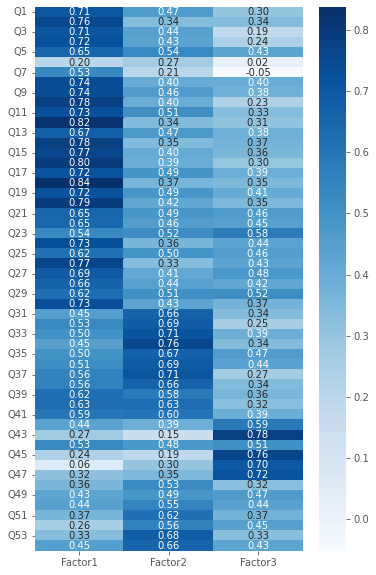

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_var, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa_var.get_factor_variance()
fa_result_fromLoading_var = pd.DataFrame(fa_var.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading_var.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading_var

,Factor1,Factor2,Factor3
SS Loadings,19.854114,13.529620,9.656840
Proportion Var,0.367669,0.250549,0.178830
Cumulative Var,0.367669,0.618217,0.797048


### Orthogonal Rotation: Quartimax

Varimax와 마찬가지로 Orthogonal Rotation의 하나이다. Varimax가 행렬의 열을 기준으로 한다면, Quartimax는 행렬의 행을 기준으로 분산을 극대화한다. 여기서 두 방법을 비교해 보았을 때 Quartimax가 제 1요인만 과대 해석하고 기타요인은 과소 해석하는 문제가 있다고 한다. 실제로 FA결과 Varimax와 가장 크게 비교되는 점은 Quartimax의 제 1요인의 변수에 대해 높은 적재량을 가진 변수들이 매우 많았으며, 나머지 2번 그리고 특히 3번의 변수에 대해 모두 낮은 적재량을 가져 변수로 사용될 수 없을 정도였다. 인자 3개로 FA를 수행한 결과 이때의 설명가능한 누적 분산은 Varimax와 같이 0.797로 나타났다.


In [ ]:
fa_qtmax = FactorAnalyzer(n_factors=3, rotation = "quartimax")
fa_qtmax.fit(x_scaled)

FactorAnalyzer(rotation='quartimax', rotation_kwargs={})

In [ ]:
fa_result_loading_qtmax = pd.DataFrame(fa_qtmax.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=x_scaled.columns)
fa_result_loading_qtmax

,Factor1,Factor2,Factor3
Q1,0.890519,-0.099938,-0.064983
Q2,0.870679,-0.059315,-0.198250
Q3,0.827981,-0.196352,-0.073069
Q4,0.857529,-0.155542,-0.097291
Q5,0.949457,0.024263,0.014077
Q6,0.303246,-0.118367,0.095723
Q7,0.470184,-0.294711,-0.144277
Q8,0.921929,-0.009864,-0.144471
Q9,0.946720,-0.037600,-0.092083
Q10,0.876029,-0.177546,-0.159122


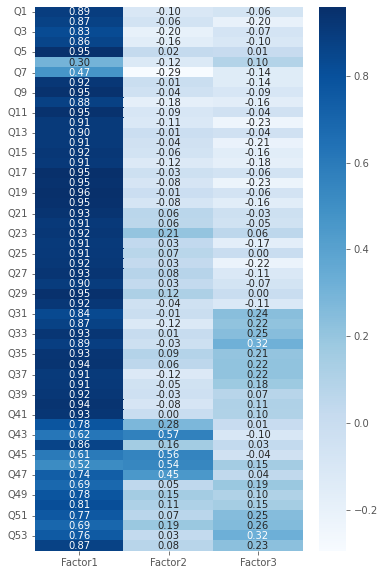

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_qtmax, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa_qtmax.get_factor_variance()
fa_result_fromLoading_obmax = pd.DataFrame(fa_qtmax.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading_obmax.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading_obmax

,Factor1,Factor2,Factor3
SS Loadings,39.967774,1.709578,1.363222
Proportion Var,0.740144,0.031659,0.025245
Cumulative Var,0.740144,0.771803,0.797048


### Oblique Rotation: Oblimin

Oblique Rotation은 Orthogonal Rotation과 달리 각각의 좌표축 간의 직각을 인정하지 않으면서 회전시킨다. 이는 요인들 사이의 상관이 존재함을 받아들이고 회전에 반영한다는 것이다. 그중 Oblimin은 인자들 사이의 상관성 정도를 제어하는 회전 방법이다. 인자 3개로 FA를 수행한 결과 이때의 설명가능한 누적 분산은 0.715로  Orthogonal Rotation보다 작게 나타났다. 마지막 factor 3의 경우 변수에 대해 높은 적재량을 가진 값이 없었다.

In [ ]:
fa_ob = FactorAnalyzer(n_factors=3, rotation = "oblimin")
fa_ob.fit(x_scaled)

FactorAnalyzer(rotation='oblimin', rotation_kwargs={})

In [ ]:
fa_result_loading_ob = pd.DataFrame(fa_ob.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=x_scaled.columns)
fa_result_loading_ob

,Factor1,Factor2,Factor3
Q1,0.928398,-0.053909,0.003969
Q2,0.933270,-0.007987,-0.142848
Q3,0.947468,-0.180001,0.006120
Q4,0.953519,-0.127070,-0.023512
Q5,0.855804,0.108471,0.071620
Q6,0.332602,-0.121045,0.137396
Q7,0.720069,-0.334281,-0.076297
Q8,0.921028,0.059498,-0.090813
Q9,0.943864,0.028097,-0.030233
Q10,1.012706,-0.154667,-0.083676


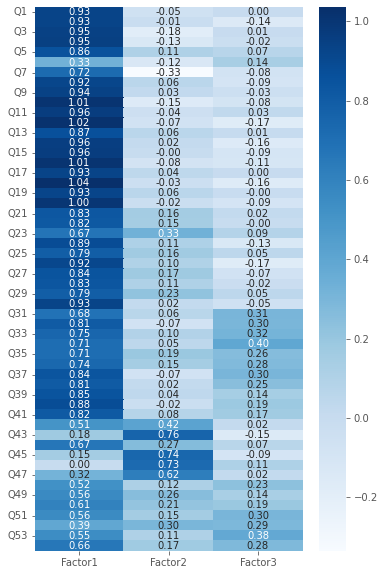

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_ob, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa_ob.get_factor_variance()
fa_result_fromLoading_ob = pd.DataFrame(fa_ob.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading_ob.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading_ob

,Factor1,Factor2,Factor3
SS Loadings,33.781612,3.208269,1.633359
Proportion Var,0.625585,0.059412,0.030247
Cumulative Var,0.625585,0.684998,0.715245


### Oblique Rotation: Promax

Oblimin과 같이 oblique rotation 방법론 중 하나이다. Promax는 회전에 의해 적재값을 어떤 승수로 올리는 방법으로 인자들 사이에 낮은 상관성을 갖도록 한다. 인자 3개로 FA를 수행한 결과 이때의 설명가능한 누적 분산은 모든 방법론 중 가장 낮은 0.577로 나타났다. 

In [ ]:
fa_pro = FactorAnalyzer(n_factors=3, rotation = "promax")
fa_pro.fit(x_scaled)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fa_result_loading_pro = pd.DataFrame(fa_pro.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=x_scaled.columns)
fa_result_loading_pro

,Factor1,Factor2,Factor3
Q1,0.698523,0.241835,-0.013894
Q2,0.862481,-0.030278,0.080847
Q3,0.746718,0.251182,-0.162343
Q4,0.770883,0.197356,-0.091381
Q5,0.517574,0.348697,0.155344
Q6,0.118932,0.340044,-0.162386
Q7,0.720611,0.041129,-0.334399
Q8,0.772259,0.063158,0.145608
Q9,0.726623,0.181760,0.093171
Q10,0.893905,0.100471,-0.104238


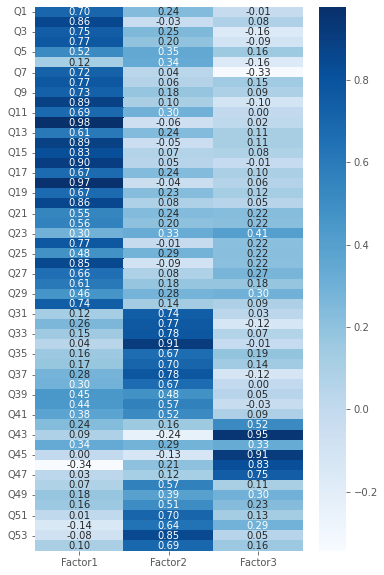

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_pro, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa_pro.get_factor_variance()
fa_result_fromLoading_pro = pd.DataFrame(fa_pro.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading_pro.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading_pro

,Factor1,Factor2,Factor3
SS Loadings,16.873657,9.649079,4.659546
Proportion Var,0.312475,0.178687,0.086288
Cumulative Var,0.312475,0.491162,0.577450


## Step 4. Results

상관된 인자들을 허용하는 oblique rotation의 3개 factor로의 설명가능한 분산은 orthogonal rotation에 비해 Promax는 0.577, Oblimin은 0.715로 낮았다. 그리고 orthogonal rotation 방법론 Varimax와 Oblimax 그리고 No rotation의 경우 모두 최종 설명 분산이 0.797로 동일했다. 
그중 가장 큰 설명 분산을 보이며 제 1번요인만을 과대 해석할 위험이 적은 Varimax를 최종적으로 선택하였다

### Orthogonal Rotation: Varimax

In [ ]:
fa_var = FactorAnalyzer(n_factors=3, rotation = "varimax")
fa_var.fit(x_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa_result_loading_var = pd.DataFrame(fa_var.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=x_scaled.columns)
fa_result_loading_var

,Factor1,Factor2,Factor3
Q1,0.707156,0.466396,0.299397
Q2,0.756113,0.339956,0.337086
Q3,0.705079,0.444522,0.186308
Q4,0.724470,0.433291,0.237524
Q5,0.653977,0.537626,0.430730
Q6,0.203874,0.270666,0.017526
Q7,0.532167,0.207121,-0.051403
Q8,0.741417,0.401780,0.399743
Q9,0.738757,0.463386,0.381686
Q10,0.782625,0.398441,0.230245


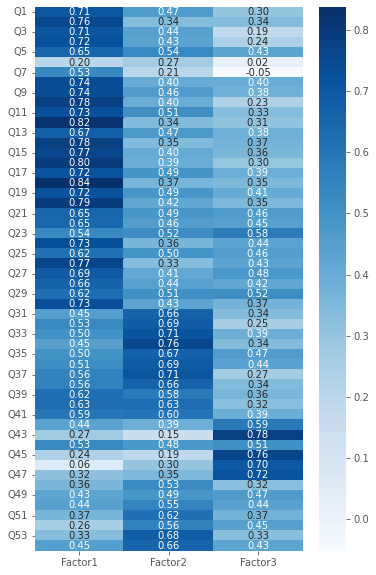

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_var, cmap="Blues", annot=True, fmt='.2f')


*   factor 1의 경우 Q6,43,45,46,47,48,51,52,53을 제외한 모든 변수들에 대해 높은 변수 적재량을 가지는 것을 확인하였다.
*   factor 2의 경우 Q2,6,7,12,14,16,18,24,26,42,43,45,46,47을 제외한 모든 변수들에 대해 높은 변수 적재량을 가지는 것을 확인하였다.
*   factor 3의 경우 Q5,8,19,21 ~ 29,35,36,42 ~ 47,49,50,52,54에 대해 높은 변수 적재량을 가지는 것을 확인하였다.





In [ ]:
fa_var.get_factor_variance()
fa_result_fromLoading_var = pd.DataFrame(fa_var.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading_var.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading_var

,Factor1,Factor2,Factor3
SS Loadings,19.854114,13.529620,9.656840
Proportion Var,0.367669,0.250549,0.178830
Cumulative Var,0.367669,0.618217,0.797048


최종적으로 3개의 factor로 설명 가능한 분산은 79.7%이다.

각 factor의 높은 적재량을 가진 값들의 공통점을 찾아 factor들을 다음과 같이 naming할 수 있었다.
  - Factor1: 가치관 공유, share values
  - Factor2: 의사소통의 적절성, communication
  - Factor3: 갈등 회피성, Conflict avoidance

In [ ]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa_var.fit_transform(x_scaled)
X_ff = pd.DataFrame(X_f[:,:5], 
                    columns = ['share values','communication','conflict avoidance'], 
                    index = x_scaled.index)
X_ff

,share values,communication,conflict avoidance
0,-0.799564,1.154307,-1.361289
1,2.051502,-0.131241,-1.499641
2,1.702631,-0.967028,-0.778990
3,1.504979,-0.086411,-1.233186
4,-0.035479,-1.284059,0.253262
...,...,...,...
165,-1.335901,2.179458,-2.363459
166,-1.598253,0.335901,0.238364
167,-0.334632,-0.813042,-0.190468
168,-1.000323,-0.561351,0.413093


In [ ]:
temp = df[['Divorce']]
X_ff = pd.concat([X_ff,temp], axis=1)

In [ ]:
X_ff.head()

,share values,communication,conflict avoidance,Divorce
0,-0.799564,1.154307,-1.361289,1
1,2.051502,-0.131241,-1.499641,1
2,1.702631,-0.967028,-0.778990,1
3,1.504979,-0.086411,-1.233186,1
4,-0.035479,-1.284059,0.253262,1


다음으로는 3개 컬럼들의 각각 2개,3개 조합 scatter plot의 결과이다. 이를 예측 target인 divorce로 색을 구분하여 scatter plot을 그려보았다.

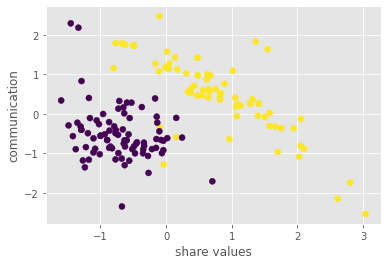

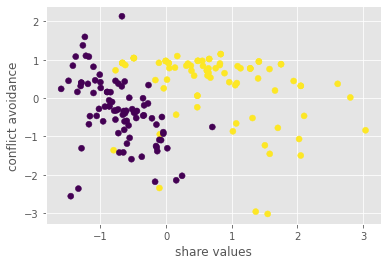

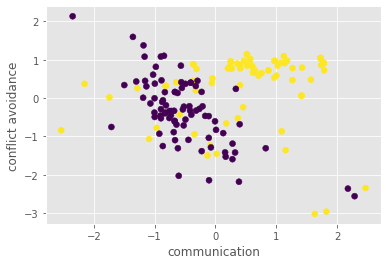

In [ ]:
from itertools import combinations
cols = ['share values','communication','conflict avoidance']
for x,y in combinations(cols,2):
  plt.scatter(x=X_ff[x],y=X_ff[y], c=X_ff.Divorce)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

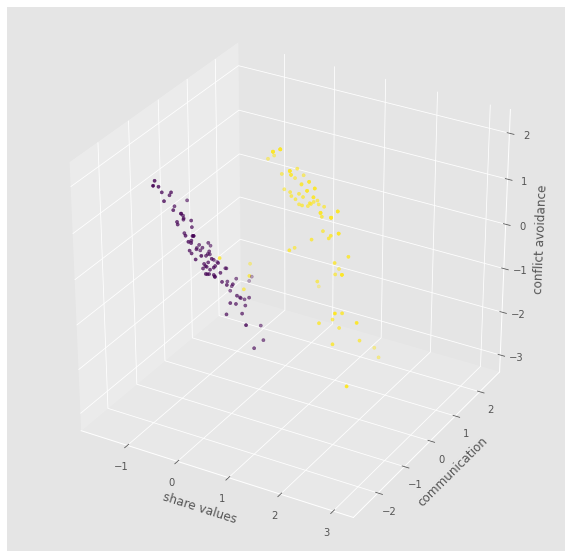

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

ax.scatter(X_ff['share values'],X_ff['communication'],X_ff['conflict avoidance'], s=10, c = X_ff.Divorce)
ax.set_xlabel('share values')
ax.set_ylabel('communication')
ax.set_zlabel('conflict avoidance')
plt.show()

In [ ]:
X_ff.to_csv('./divorce_fa.csv', encoding = 'utf-8', index = False)

# EDA/Preprocessing

In [8]:
df = pd.read_csv('./divorce_fa.csv', encoding = 'utf-8')

In [9]:
df.head()

,share values,communication,conflict avoidance,Divorce
0,-0.799564,1.154307,-1.361289,1
1,2.051502,-0.131241,-1.499641,1
2,1.702631,-0.967028,-0.778990,1
3,1.504979,-0.086411,-1.233186,1
4,-0.035479,-1.284059,0.253262,1


In [ ]:
df.shape

(170, 4)

In [10]:
y = df['Divorce']
x = df.drop(columns = 'Divorce')

In [ ]:
x.describe()

,share values,communication,conflict avoidance
count,1.700000e+02,1.700000e+02,1.700000e+02
mean,3.924965e-16,1.776357e-16,-1.573904e-16
std,9.949108e-01,9.772405e-01,9.511179e-01
min,-1.598253e+00,-2.537947e+00,-3.023428e+00
25%,-7.270141e-01,-7.297948e-01,-5.539794e-01
50%,-1.579209e-01,-1.498550e-01,2.458132e-01
75%,6.465214e-01,6.134244e-01,7.901314e-01
max,3.038167e+00,2.469319e+00,2.133040e+00


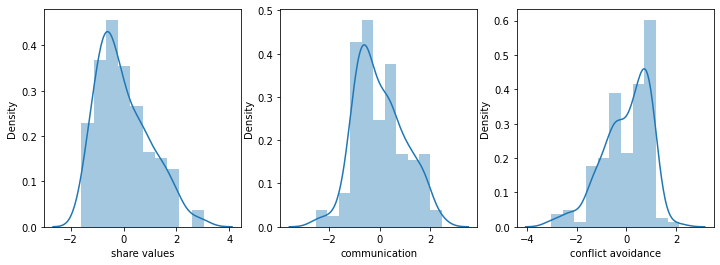

In [11]:
f, axes = plt.subplots(ncols = 3, figsize=(12, 4))

sns.distplot(x[x.columns[0]], ax=axes[0])

sns.distplot(x[x.columns[1]], ax=axes[1])

sns.distplot(x[x.columns[2]], ax=axes[2])


plt.show()

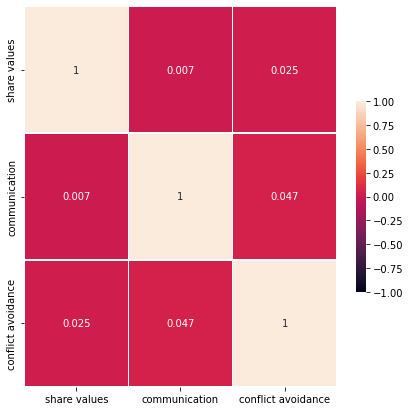

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(x.corr(), 
            #cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

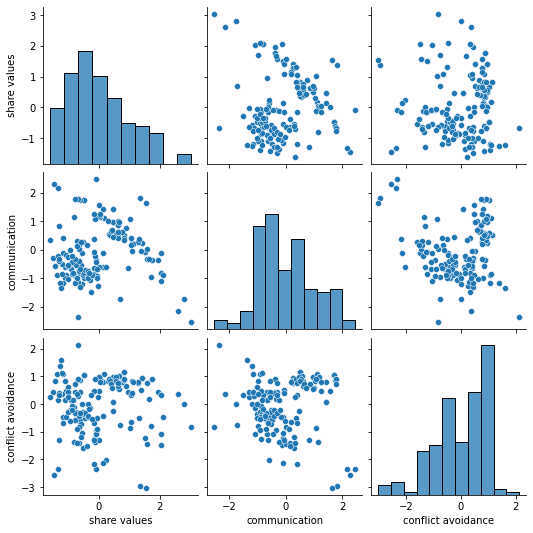

In [13]:
sns.pairplot(x)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(x)

In [ ]:
scaled = pd.DataFrame(scaled, columns = x.columns)
scaled.describe()

,share values,communication,conflict avoidance
count,1.700000e+02,1.700000e+02,1.700000e+02
mean,1.593497e-16,1.005731e-16,1.120019e-16
std,1.002954e+00,1.002954e+00,1.002954e+00
min,-1.611174e+00,-2.604727e+00,-3.188206e+00
25%,-7.328917e-01,-7.489976e-01,-5.841715e-01
50%,-1.591976e-01,-1.537981e-01,2.592102e-01
75%,6.517482e-01,6.295652e-01,8.331940e-01
max,3.062729e+00,2.534294e+00,2.249291e+00


# 계층적 클러스터링 (Hierarchical Clustering)
- linkage method  
  1) 최단연결법 (single): 생성된 군집에서 중심과 거리가 **가까운** 관측치끼리 군집화  
  2) 최장연결법 (complete): 생성된 군집에서 중심과 거리가 **먼** 관측치끼리 군집화  
  3) 평균연결법 (average): 군집 내 모든 데이터와 다른 군집 내 모든 데이터 간의 거리 **평균**을 계산하여 군집화  
  4) 중앙연결법 (centroid): 군집 내 **centroid**과 다른 군집 내 median까지의 거리를 계산하여 가까운 것끼리 군집화  

## Step 1. 거리 계산에 따른 클러스터링

In [ ]:
df_hierarchical = scaled.copy()

### 1-1) 최장연결법 (complete): 생성된 군집에서 중심과 거리가 **먼** 관측치끼리 군집화 

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters_complete = linkage(y=df_hierarchical, method='complete', metric='euclidean')
clusters_complete

array([[1.20000000e+01, 1.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.80000000e+01, 3.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 2.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.60000000e+01, 5.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.50000000e+01, 1.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 2.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.30000000e+01, 4.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.90000000e+01, 1.78000000e+02, 0.00000000e+00, 3.00000000e+00],
       [4.50000000e+01, 4.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 3.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.90000000e+01, 6.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.20000000e+01, 1.82000000e+02, 0.00000000e

In [ ]:
pd.DataFrame(clusters_complete)

,0,1,2,3
0,12.0,13.0,0.000000,2.0
1,10.0,11.0,0.000000,2.0
2,28.0,30.0,0.000000,2.0
3,23.0,25.0,0.000000,2.0
4,17.0,19.0,0.000000,2.0
...,...,...,...,...
164,325.0,330.0,3.212051,74.0
165,328.0,334.0,4.095334,122.0
166,332.0,335.0,5.165561,127.0
167,331.0,333.0,5.238421,43.0


In [ ]:
clusters_complete.shape

(169, 4)

#### 1-1-2) 군집 수 결정

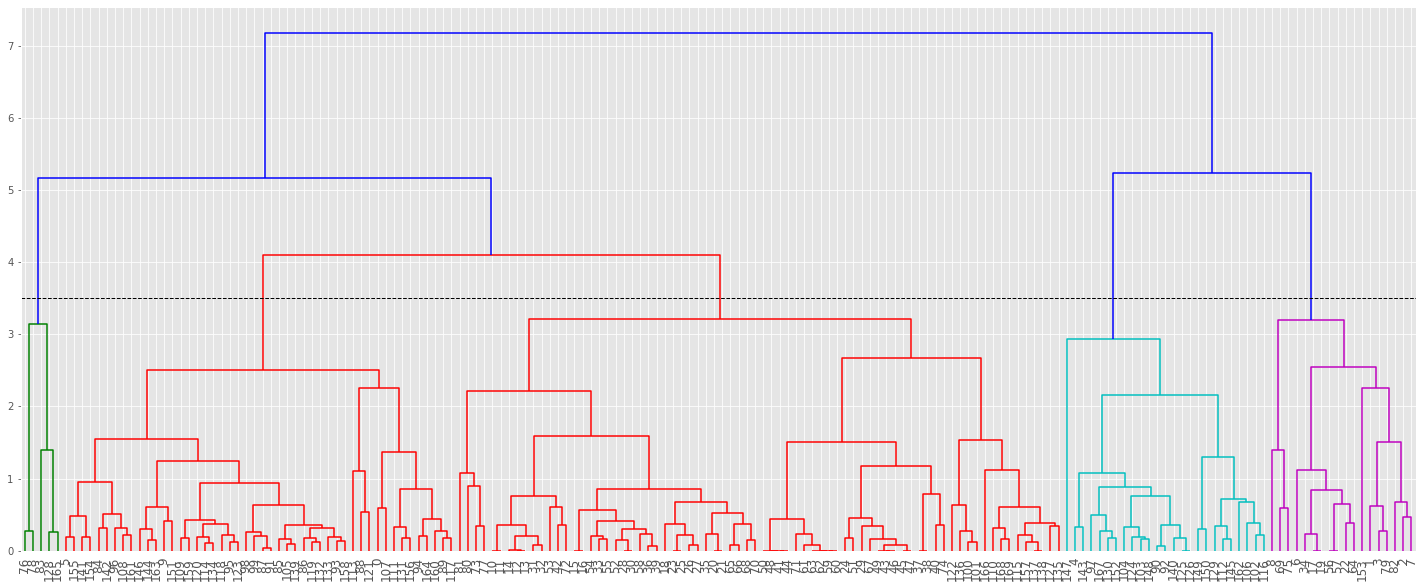

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters_complete, leaf_rotation=90, leaf_font_size=12,)
plt.axhline(y=3.5, color='black', linewidth=1, linestyle='--')
plt.show()

In [ ]:
cut_tree_complete = fcluster(clusters_complete, t=3.5, criterion='distance')
cut_tree_complete

array([2, 5, 5, 5, 4, 2, 5, 5, 5, 2, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 5, 3,
       3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 1, 3, 1, 5, 3, 3, 5, 1, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 2, 2, 2,
       3, 2, 4, 2, 2, 3, 4, 2, 2, 2, 2, 2, 3, 2, 4, 4, 4, 3, 1, 4, 4, 2,
       2, 2, 2, 3, 3, 3, 3, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 5,
       2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 1, 3, 4, 3, 3], dtype=int32)

In [ ]:
pd.Series(cut_tree_complete).value_counts()

3    74
2    48
4    25
5    18
1     5
dtype: int64

### 1-2) 최단연결법 (single): 생성된 군집에서 중심과 거리가 **가까운** 관측치끼리 군집화

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=df_hierarchical, method='single', metric='euclidean')
clusters

array([[1.25000000e+02, 1.26000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.37000000e+02, 1.38000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.20000000e+01, 1.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.80000000e+01, 3.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.50000000e+01, 1.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 2.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 2.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.50000000e+01, 4.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.30000000e+01, 4.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.90000000e+01, 1.80000000e+02, 0.00000000e+00, 3.00000000e+00],
       [5.60000000e+01, 5.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 3.80000000e+01, 0.00000000e

In [ ]:
pd.DataFrame(clusters)

,0,1,2,3
0,125.0,126.0,0.000000,2.0
1,137.0,138.0,0.000000,2.0
2,17.0,19.0,0.000000,2.0
3,12.0,13.0,0.000000,2.0
4,10.0,11.0,0.000000,2.0
...,...,...,...,...
164,8.0,333.0,1.237848,164.0
165,83.0,275.0,1.279505,3.0
166,147.0,334.0,1.296831,165.0
167,335.0,336.0,1.586221,168.0


#### 1-2-2) 군집 수 결정

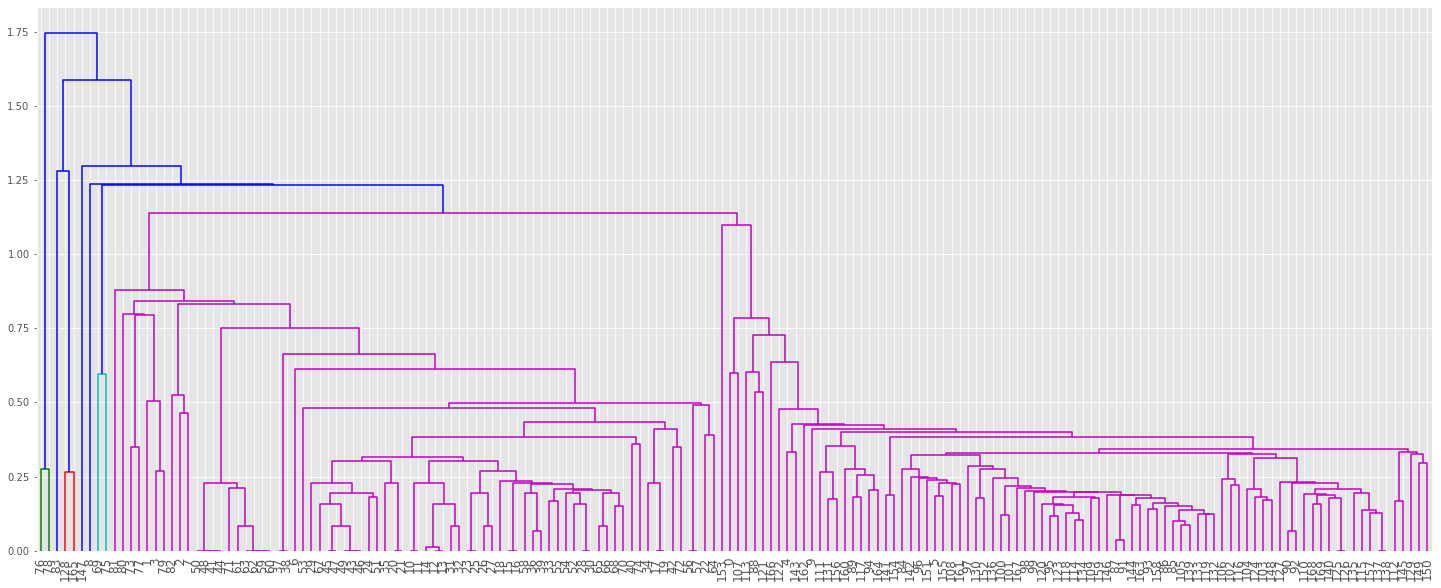

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.axhline(y=4, color='black', linewidth=1, linestyle='--')
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

1    170
dtype: int64

### 1-3) 평균연결법 (average): 군집 내 모든 데이터와 다른 군집 내 모든 데이터 간의 거리 **평균**을 계산하여 군집화 

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=df_hierarchical, method='average', metric='euclidean')
clusters

array([[1.20000000e+01, 1.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.80000000e+01, 3.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.60000000e+01, 5.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.50000000e+01, 1.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 2.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 2.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.30000000e+01, 4.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.90000000e+01, 1.78000000e+02, 0.00000000e+00, 3.00000000e+00],
       [4.50000000e+01, 4.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 3.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.10000000e+01, 4.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.80000000e+01, 1.82000000e+02, 0.00000000e

In [ ]:
pd.DataFrame(clusters)

,0,1,2,3
0,12.0,13.0,0.000000,2.0
1,10.0,11.0,0.000000,2.0
2,28.0,30.0,0.000000,2.0
3,17.0,19.0,0.000000,2.0
4,56.0,57.0,0.000000,2.0
...,...,...,...,...
164,330.0,333.0,2.583568,161.0
165,254.0,324.0,2.608961,5.0
166,147.0,334.0,3.561402,162.0
167,323.0,336.0,3.909942,165.0


#### 1-3-2) 군집 수 결정

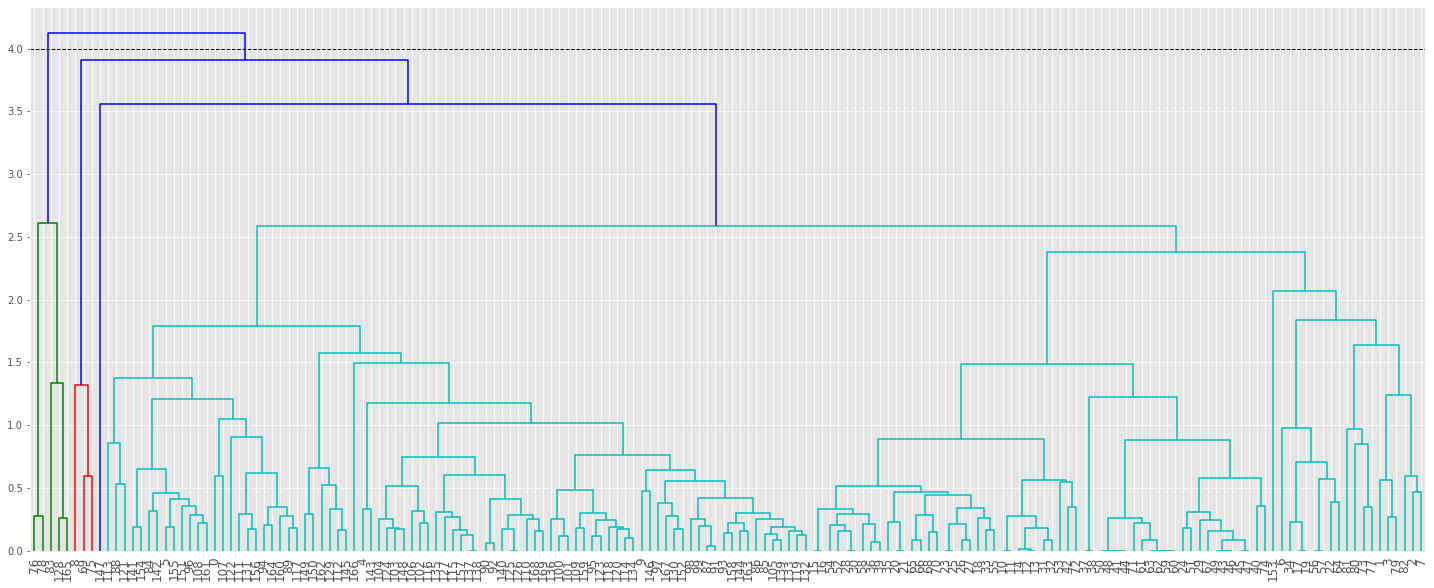

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.axhline(y=4, color='black', linewidth=1, linestyle='--')
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

2    165
1      5
dtype: int64

### 1-4) 중앙연결법 (centroid): 군집 내 **centroid**과 다른 군집 내 median까지의 거리를 계산하여 가까운 것끼리 군집화 

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=df_hierarchical, method='centroid', metric='euclidean')
clusters

array([[1.50000000e+01, 1.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.37000000e+02, 1.38000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 3.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 2.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.10000000e+01, 4.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.30000000e+01, 4.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.80000000e+01, 1.75000000e+02, 0.00000000e+00, 3.00000000e+00],
       [4.50000000e+01, 4.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.90000000e+01, 1.77000000e+02, 0.00000000e+00, 3.00000000e+00],
       [2.30000000e+01, 2.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+01, 1.78000000e+02, 0.00000000e+00, 4.00000000e+00],
       [1.20000000e+01, 1.30000000e+01, 0.00000000e

In [ ]:
pd.DataFrame(clusters)

,0,1,2,3
0,15.0,16.0,0.000000,2.0
1,137.0,138.0,0.000000,2.0
2,17.0,19.0,0.000000,2.0
3,37.0,38.0,0.000000,2.0
4,20.0,21.0,0.000000,2.0
...,...,...,...,...
164,326.0,331.0,2.094063,75.0
165,333.0,334.0,2.011087,162.0
166,262.0,324.0,2.582359,5.0
167,335.0,336.0,3.604616,167.0


#### 1-4-2) 군집 수 결정

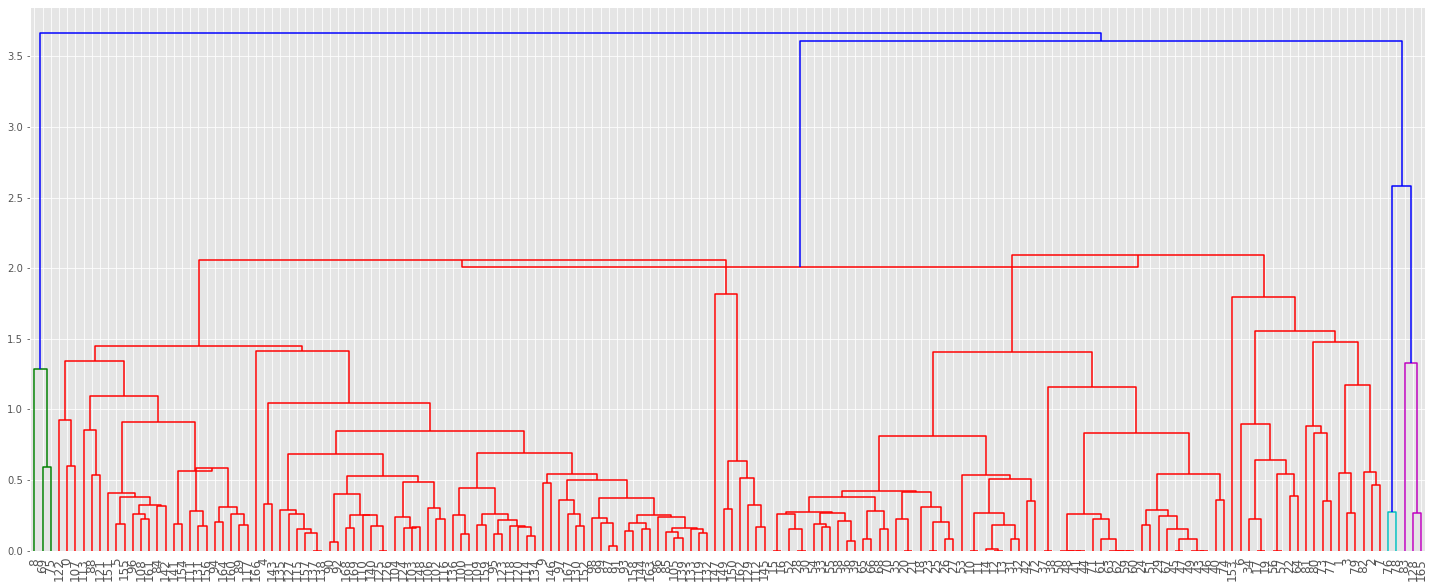

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.axhline(y=4, color='black', linewidth=1, linestyle='--')
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

1    170
dtype: int64

### 1-5) Ward

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters_ward = linkage(y=df_hierarchical, method='ward', metric='euclidean')
clusters_ward

array([[1.20000000e+01, 1.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.80000000e+01, 3.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 2.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.50000000e+01, 1.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 2.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.30000000e+01, 4.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.90000000e+01, 1.77000000e+02, 0.00000000e+00, 3.00000000e+00],
       [4.50000000e+01, 4.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.60000000e+01, 5.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 3.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.90000000e+01, 6.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.20000000e+01, 1.82000000e+02, 0.00000000e

In [ ]:
pd.DataFrame(clusters_ward)

,0,1,2,3
0,12.0,13.0,0.000000,2.0
1,28.0,30.0,0.000000,2.0
2,23.0,25.0,0.000000,2.0
3,17.0,19.0,0.000000,2.0
4,10.0,11.0,0.000000,2.0
...,...,...,...,...
164,330.0,332.0,7.627571,32.0
165,326.0,331.0,9.125257,48.0
166,325.0,335.0,11.290102,71.0
167,333.0,334.0,13.658360,99.0


#### 1-5-2) 군집 수 결정

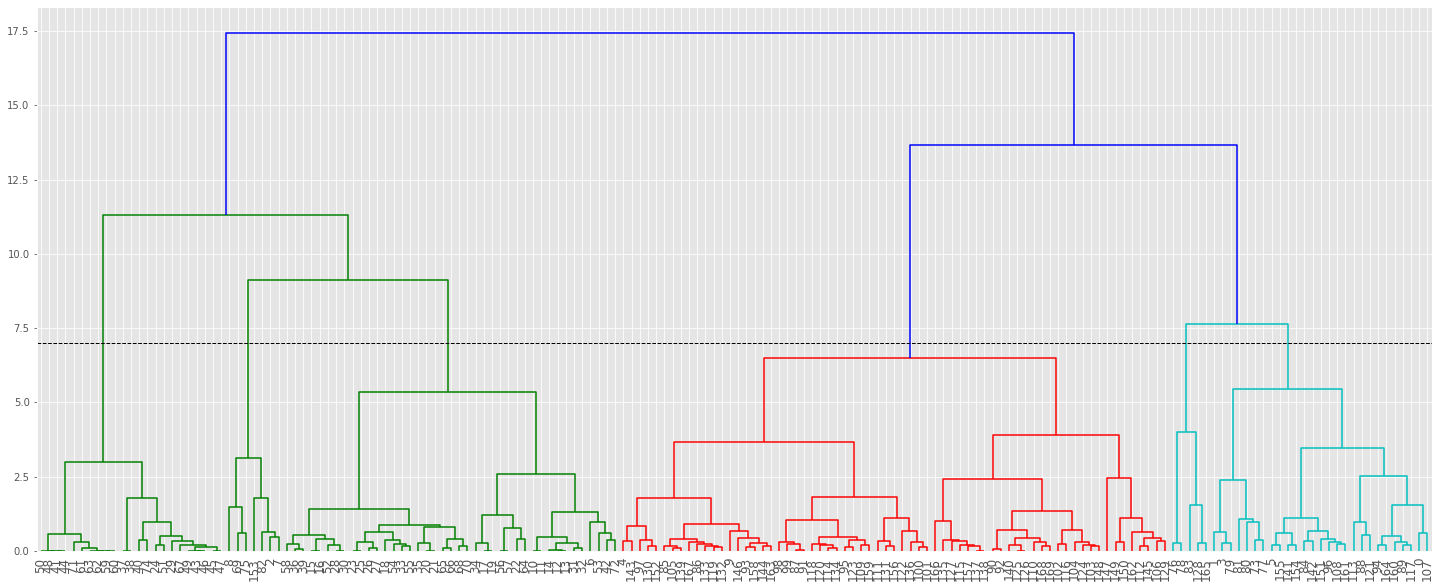

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters_ward, leaf_rotation=90, leaf_font_size=12,)
plt.axhline(y=7, color='black', linewidth=1, linestyle='--')
plt.show()

In [ ]:
cut_tree_ward = fcluster(clusters_ward, t=7, criterion='distance')
cut_tree_ward

array([6, 6, 2, 6, 4, 6, 3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3,
       3, 1, 3, 2, 3, 1, 3, 6, 1, 2, 5, 6, 5, 6, 6, 6, 2, 5, 6, 4, 4, 4,
       6, 6, 4, 4, 4, 4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4,
       4, 4, 4, 6, 4, 4, 4, 6, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 2,
       6, 6, 4, 4, 4, 4, 6, 6, 4, 4, 6, 5, 4, 4, 4, 4], dtype=int32)

In [ ]:
pd.Series(cut_tree_ward).value_counts()

4    67
3    41
6    27
1    23
2     7
5     5
dtype: int64

**Complete**, **Ward** 로 결정

1.   Complete
2.   Ward



## Step 3. Evaluation

## 3-1) Complete

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(df_hierarchical, cut_tree_complete)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(df_hierarchical, cut_tree_complete)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.16299245 0.29039856 0.41570811 0.1754488  0.31597329] 
Silhouette Score shape: (170,) 

Silhouette Average Score:0.316


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

1. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

In [ ]:
df_hierarchical['hc_cluster'] = cut_tree_complete
df_hierarchical['silhouette_coeff'] = score_samples
df_hierarchical

,share values,communication,conflict avoidance,hc_cluster,silhouette_coeff
0,-0.806028,1.184680,-1.435479,2,0.162992
1,2.068088,-0.134694,-1.581372,5,0.290399
2,1.716396,-0.992473,-0.821445,5,0.415708
3,1.517146,-0.088685,-1.300395,5,0.175449
4,-0.035766,-1.317846,0.267065,4,0.315973
...,...,...,...,...,...
165,-1.346701,2.236805,-2.492268,1,0.432773
166,-1.611174,0.344740,0.251355,3,-0.145926
167,-0.337337,-0.834435,-0.200848,4,-0.106201
168,-1.008411,-0.576121,0.435607,3,-0.572087


In [ ]:
# 군집별 평균 silhouette_score 값
print(df_hierarchical.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', df_hierarchical.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.465440
2    0.374675
3    0.231624
4    0.409370
5    0.337460
Name: silhouette_coeff, dtype: float64
표준편차: 0.08759290305958017


### 3-1-2) EDA/Interpretation

In [ ]:
# 군집별 통계(평균)
cluster_g = df_hierarchical.groupby('hc_cluster')
cluster_g.mean()

,share values,communication,conflict avoidance,silhouette_coeff
hc_cluster,,,,
1,0.004771,2.134433,-2.796266,0.465440
2,-0.458309,-0.398393,-0.879268,0.374675
3,0.115129,0.695646,0.620963,0.231624
4,-0.827740,-1.092603,0.557321,0.409370
5,1.897161,-0.872889,-0.205451,0.337460


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,share values,communication,conflict avoidance,silhouette_coeff
hc_cluster,,,,
1,1.440097,0.351228,0.341386,0.040164
2,0.342835,0.493286,0.564814,0.146761
3,0.861123,0.695827,0.514119,0.382139
4,0.377270,0.360722,0.625334,0.178367
5,0.576724,0.760621,0.860777,0.166158


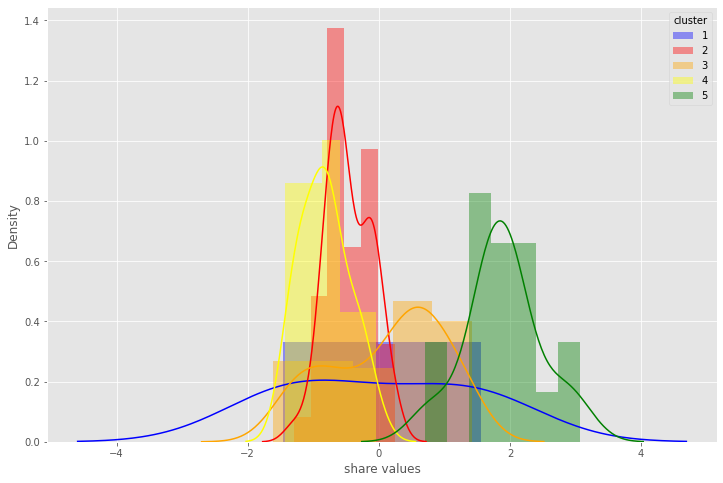

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.distplot(df_hierarchical[df_hierarchical.hc_cluster == 1]["share values"], 
             color="blue", label=1)

sns.distplot(df_hierarchical[df_hierarchical.hc_cluster == 2]["share values"], 
             color="red", label=2)

sns.distplot(df_hierarchical[df_hierarchical.hc_cluster == 3]["share values"], 
             color="orange", label=3)

sns.distplot(df_hierarchical[df_hierarchical.hc_cluster == 4]["share values"], 
             color="yellow", label=4)

sns.distplot(df_hierarchical[df_hierarchical.hc_cluster == 5]["share values"], 
             color="green", label=5)

plt.legend(title="cluster")
plt.show()

<Figure size 864x864 with 0 Axes>

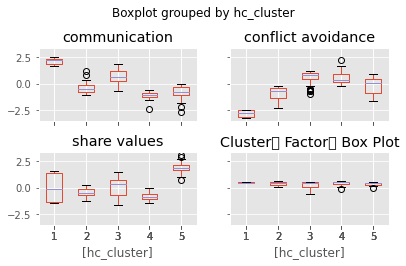

In [ ]:
# 시각화방법 2
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12))
df_hierarchical.boxplot(by='hc_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.title("Cluster별 Factor의 Box Plot")
plt.show()

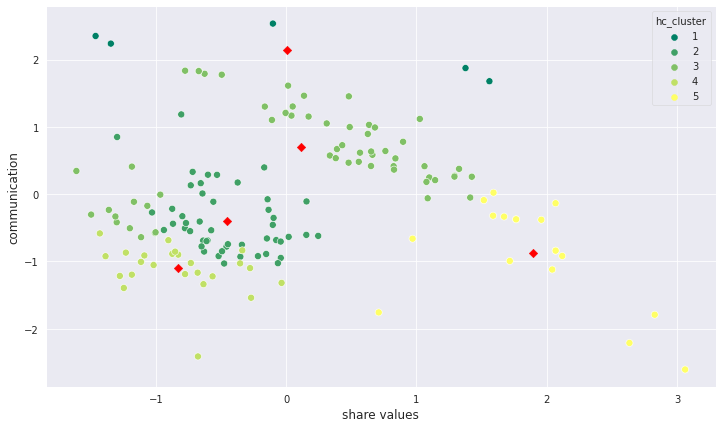

In [ ]:
# 시각화방법 3
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
# plt.scatter(x=df_hierarchical['factor1'], y=df_hierarchical['factor2'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화
sns.scatterplot(data=df_hierarchical, x='share values',y='communication',hue=df_hierarchical['hc_cluster'], s=50, palette='summer')

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

No handles with labels found to put in legend.


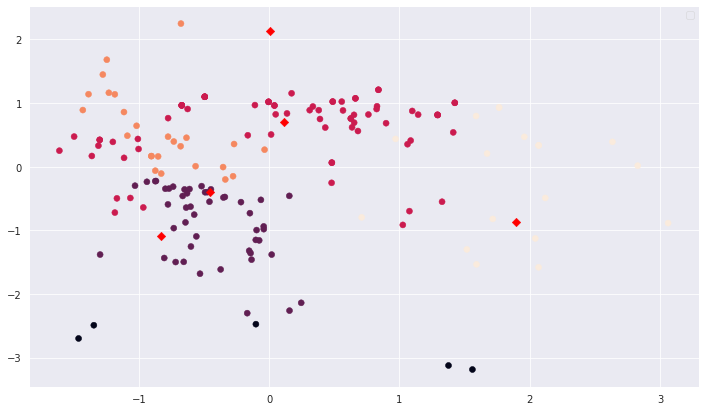

In [ ]:
# 시각화방법 3
sns.set_style("darkgrid")
plt.figure(figsize=(12,7))
plt.scatter(x=df_hierarchical['share values'], y=df_hierarchical['conflict avoidance'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화
plt.legend()
hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()


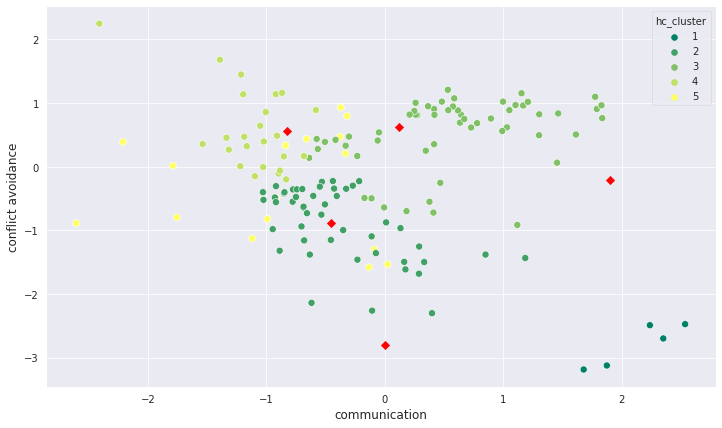

In [ ]:
# 시각화방법 3
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
# plt.scatter(x=df_hierarchical['factor1'], y=df_hierarchical['factor2'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화
sns.scatterplot(data=df_hierarchical, x='communication',y='conflict avoidance',hue=df_hierarchical['hc_cluster'], s=50, palette='summer')

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

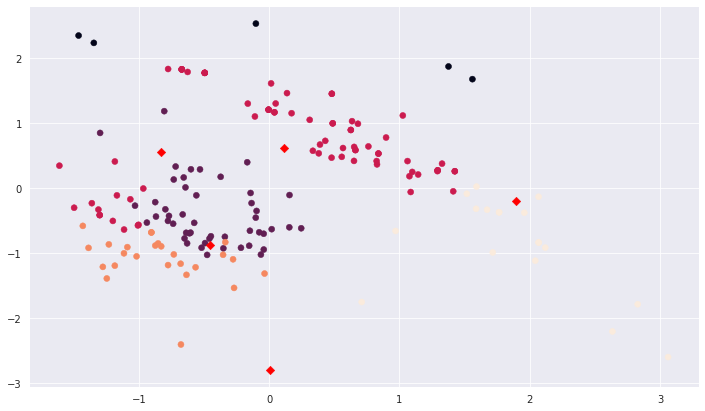

In [ ]:
# 시각화방법 3
plt.figure(figsize=(12,7))
plt.scatter(x=df_hierarchical['share values'], y=df_hierarchical['communication'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()


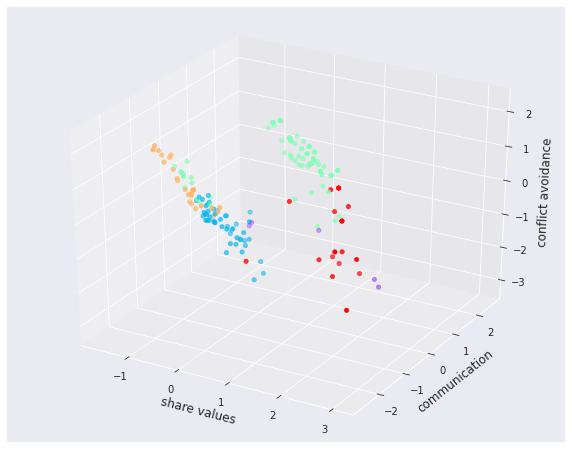

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df_hierarchical['share values'], df_hierarchical['communication'], df_hierarchical['conflict avoidance'],c = df_hierarchical['hc_cluster'],cmap=plt.cm.get_cmap('rainbow', 5))
ax.set_xlabel('share values', rotation=150)
ax.set_ylabel('communication')
ax.set_zlabel(r'conflict avoidance', rotation=60)
plt.show()

## 3-2) Ward

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(df_hierarchical, cut_tree_ward)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(df_hierarchical, cut_tree_ward)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [ 0.18447911 -0.08853468  0.37793225  0.13994196  0.40355836] 
Silhouette Score shape: (170,) 

Silhouette Average Score:0.406


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

1. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

In [ ]:
df_hierarchical['hc_cluster'] = cut_tree_ward
df_hierarchical['silhouette_coeff'] = score_samples
df_hierarchical

,share values,communication,conflict avoidance,hc_cluster,silhouette_coeff
0,-0.806028,1.184680,-1.435479,6,0.184479
1,2.068088,-0.134694,-1.581372,6,-0.088535
2,1.716396,-0.992473,-0.821445,2,0.377932
3,1.517146,-0.088685,-1.300395,6,0.139942
4,-0.035766,-1.317846,0.267065,4,0.403558
...,...,...,...,...,...
165,-1.346701,2.236805,-2.492268,5,0.396435
166,-1.611174,0.344740,0.251355,4,0.225704
167,-0.337337,-0.834435,-0.200848,4,0.477837
168,-1.008411,-0.576121,0.435607,4,0.606314


In [ ]:
# 군집별 평균 silhouette_score 값
print(df_hierarchical.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', df_hierarchical.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.586706
2    0.404856
3    0.379545
4    0.440305
5    0.391310
6    0.207275
Name: silhouette_coeff, dtype: float64
표준편차: 0.12176005360963092


### 3-2-2) EDA/Interpretation

In [ ]:
# 군집별 통계(평균)
cluster_g = df_hierarchical.groupby('hc_cluster')
cluster_g.mean()

,share values,communication,conflict avoidance,silhouette_coeff
hc_cluster,,,,
1,-0.215049,1.514473,0.861219,0.586706
2,2.159351,-1.627412,-0.531302,0.404856
3,0.988172,0.339311,0.781599,0.379545
4,-0.807707,-0.705738,0.018431,0.440305
5,0.004771,2.134433,-2.796266,0.391310
6,0.126227,-0.027425,-1.310666,0.207275


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,share values,communication,conflict avoidance,silhouette_coeff
hc_cluster,,,,
1,0.385686,0.284360,0.302216,0.143033
2,0.796174,0.645856,0.545695,0.151660
3,0.501741,0.512068,0.246192,0.225915
4,0.379449,0.460851,0.648086,0.172547
5,1.440097,0.351228,0.341386,0.054896
6,0.812791,0.572983,0.480801,0.183866


<Figure size 864x864 with 0 Axes>

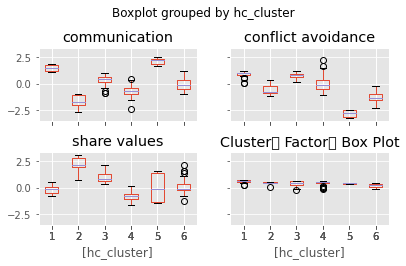

In [ ]:
# 시각화방법 2
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12))
df_hierarchical.boxplot(by='hc_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.title("Cluster별 Factor의 Box Plot")
plt.show()

share values communication conflict avoidance



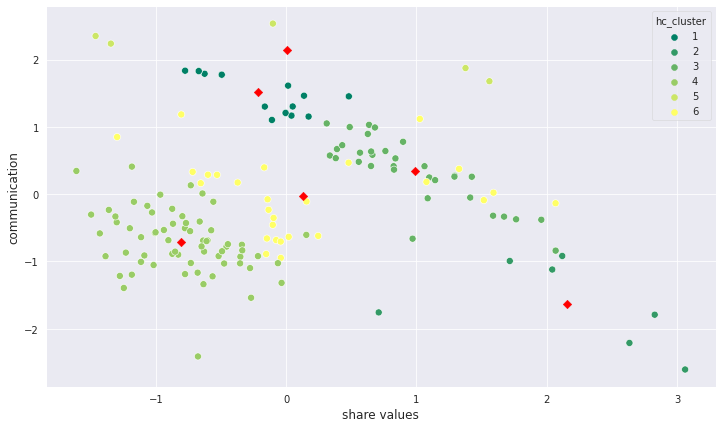

In [ ]:
# 시각화방법 3
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
# plt.scatter(x=df_hierarchical['factor1'], y=df_hierarchical['factor2'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화
sns.scatterplot(data=df_hierarchical, x='share values',y='communication',hue=df_hierarchical['hc_cluster'], s=50, palette='summer')

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

No handles with labels found to put in legend.


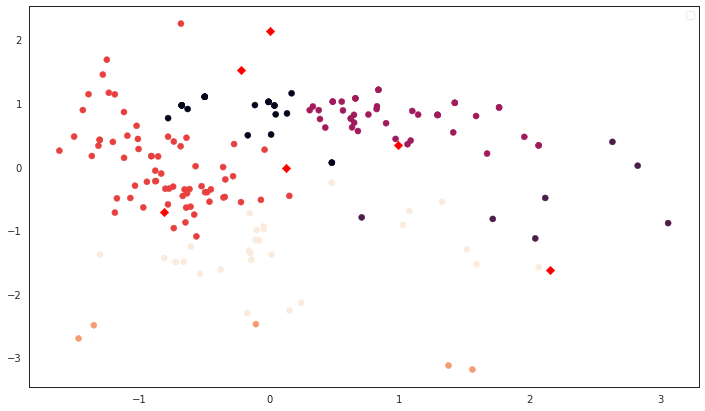

In [ ]:
# 시각화방법 3
sns.set_style("white")
plt.figure(figsize=(12,7))
plt.scatter(x=df_hierarchical['share values'], y=df_hierarchical['conflict avoidance'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화
plt.legend()
hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()


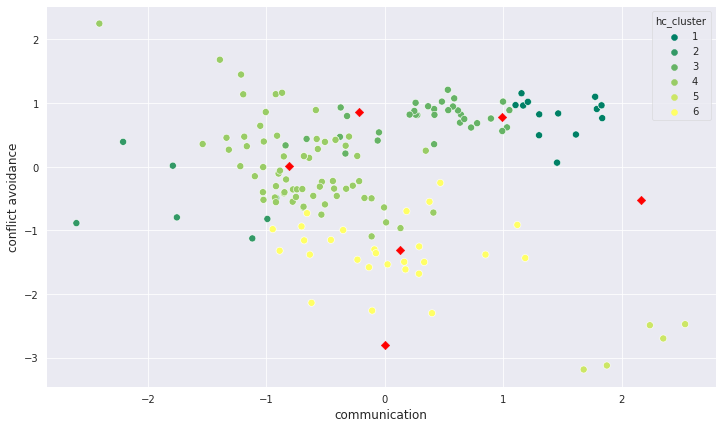

In [ ]:
# 시각화방법 3
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
# plt.scatter(x=df_hierarchical['factor1'], y=df_hierarchical['factor2'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화
sns.scatterplot(data=df_hierarchical, x='communication',y='conflict avoidance',hue=df_hierarchical['hc_cluster'], s=50, palette='summer')

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

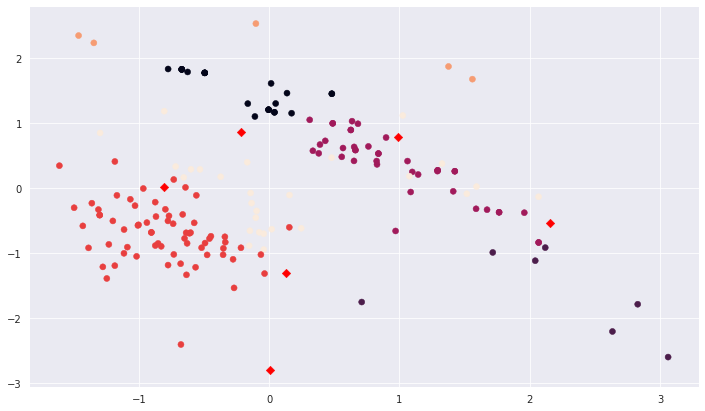

In [ ]:
# 시각화방법 3
plt.figure(figsize=(12,7))
plt.scatter(x=df_hierarchical['share values'], y=df_hierarchical['communication'], c=df_hierarchical['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()


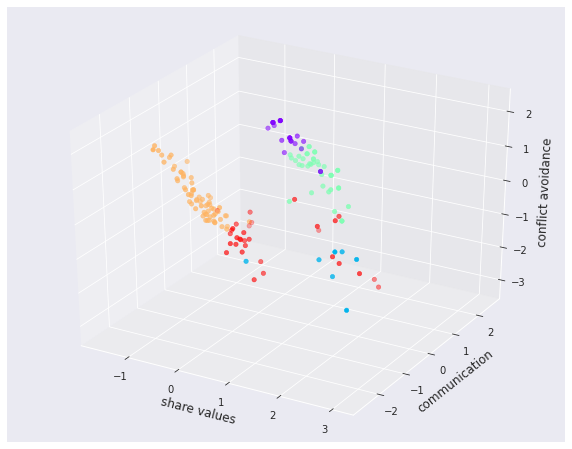

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df_hierarchical['share values'], df_hierarchical['communication'], df_hierarchical['conflict avoidance'],c = df_hierarchical['hc_cluster'],cmap=plt.cm.get_cmap('rainbow', 5))
ax.set_xlabel('share values', rotation=150)
ax.set_ylabel('communication')
ax.set_zlabel(r'conflict avoidance', rotation=60)
plt.show()

# K-평균 클러스터링

## Step 1. K 선정

K의 선정은 다음과 같은 방법들로 결정할 수 있다.

1. EDA : 데이터의 형태를 살펴보고 결정한다.
2. Elbow method: 클러스터의 개수를 늘려가며 SSE를 계산, SSE가 줄어드는 비율이 급격히 작아지는 부분을 elbow라 설정
3. Silhouette score : 샘플 i와 그 객체가 속한 군집의 비유사성과, 샘플이 속하지 않은 다른 군집의 모든 데이터들과의 평균거리를 활용해 모든 i에 대해 평균 Silhouette score를 구할 수 있으며, Silhouette score가 최대가 되는 군집개수를 선택한다.(=가장 군집이 잘되었음)
4. Calinski Harabasz score: between-clusters dispersion mean 과 within-cluster dispersion의 비율로 값이 높을수록 군집화가 잘 되었음을 의미한다.

첫번째 방법인 EDA로 형태를 살펴보는 방법은 주관적이며 3d이상으로 시각화 하여 보기 어렵다는 단점이 있다. 따라서 2,3,4번 방법으로 K의 선정을 진행한다.

In [ ]:
data_k = scaled.copy()

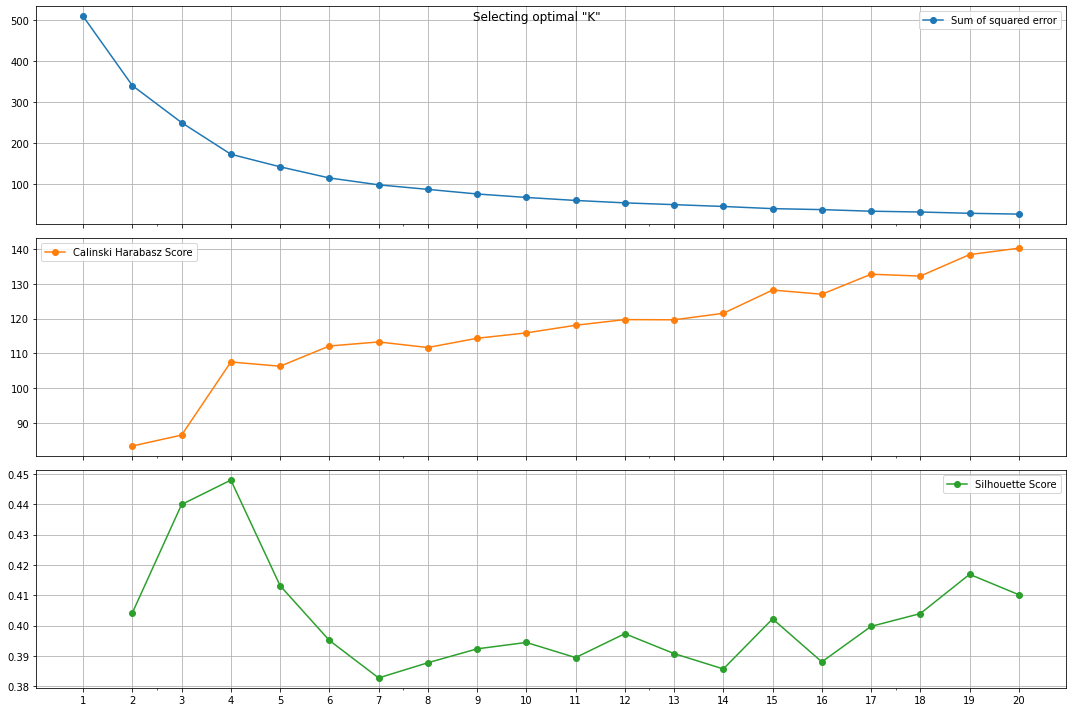

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_k)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_k)
        chs = calinski_harabasz_score(data_k, cluster)
        ss = silhouette_score(data_k, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

첫번째 그림은 SSE를 시각화 한것으로 Elbow 방법에 해당한다. 하지만 그림과 같이 Elbow 방법으로 급격히 꺾이는 지점을 명확히 정할 수 없는 경우, 한 군집의 개수를 선택하기 쉽지 않고 군집 내 분산만 고려하여 잘못된 k의 선택을 유발할 수 있다. 따라서 본 실습에서는 2번째, 3번째 방법을 우선적으로 고려한다. 2번째, 3번째 방법에서 Silhouette score와 Calinski Harabasz score가 클 때 clustering이 잘 이루어졌다고 할 수 있다. 2번 그림의 경우 Calinski Harabasz score가 2에서부터 20까지 갈 수록 증가하고, 3번그림의 경우 Silhouette score가 4에서 가장 크게 나타난다.

clustering시 그룹의 수가 커질 경우 해석이 어렵고 Silhouette score가 4에서 0.45로 충분히 크게 나타나기 떄문에, 해석이 용이하고 그룹화가 잘되었다고 판단 가능한 4로 그룹 수를 최종 결정하여 클러스터링을 진행하였다.

주로 사용되는 Silhouette score의 평가 기준은 다음과 같다.


|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|


## Step 2. K-means clustering

Kmeans 수행시 algorithm의 선택이 가능한데, 그때의 옵션은 full, elkan, auto가 있다. 각각의 기능은 다음과 같다.
- full : 모집단을 추정 후 해당 모집단에서 샘플이 추출되었을 확률을 기반으로 하는 EM-style algorithm
- elkan : triangle inequality를 사용해서 더 효율적이지만, sparse data에는 적당하지 않음
- auto : dense data에는 "elkan", sparse data에는 "full"로 자동 선정

본 실습에서는 data의 desity에 따라 알고리즘을 elkan과 full중 자동 선택 해주는 auto로 고정하여 진행하였다.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=2022, algorithm='auto')
model.fit(data_k)

KMeans(n_clusters=4, random_state=2022)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_k)
pred

array([0, 3, 3, 3, 1, 0, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 0, 3, 0, 3, 2, 0, 3, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
for i in range(4):
  print('{}번 클러스터의 observation 수 : {}'.format(i,list(pred).count(i)))

0번 클러스터의 observation 수 : 27
1번 클러스터의 observation 수 : 66
2번 클러스터의 observation 수 : 55
3번 클러스터의 observation 수 : 22


In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_k.columns)

In [ ]:
centroids

,share values,communication,conflict avoidance
0,-0.278340,0.439058,-1.646484
1,-0.776187,-0.758070,0.033965
2,0.358040,0.971691,0.840211
3,1.775061,-0.693861,-0.181738


## Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_k['k_means_cluster'] = pred
data_k['k_silhouette_coeff'] = silhouette_samples(data_k, data_k['k_means_cluster'])

k_average_score = silhouette_score(data_k, data_k['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.515


In [ ]:
# 군집별 평균 silhouette_score 값
data_k.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.331355
1    0.571553
2    0.586741
3    0.397161
Name: k_silhouette_coeff, dtype: float64

n_clusters=4일때의 개별 Silhouette score의 클러스터별 분포를 시각화 하면 다음과 같다. 0번 그룹의 경우 1/3정도가 평균 실루엣 스코어를 넘기고, 1,2의 경우 80%이상이, 3번 그룹의 경우 극히 일부가 평균 실루엣 스코어를 넘긴다.

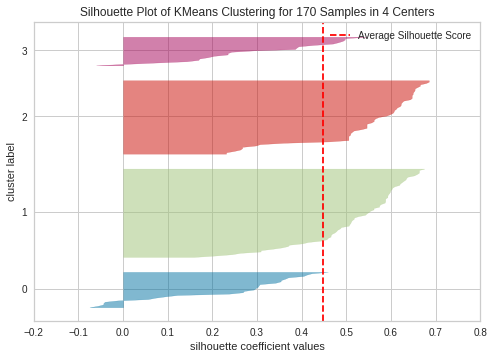

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
#visualizer 생성
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_k)      
visualizer.show()

클러스터 0~3을 2차원과 3차원으로 각각 시각화한 결과는 아래와 같다.

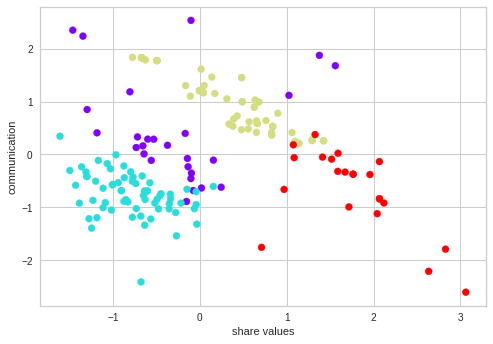

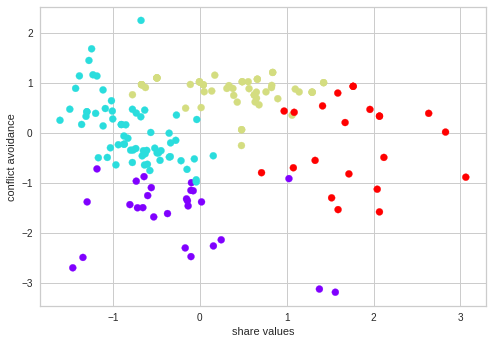

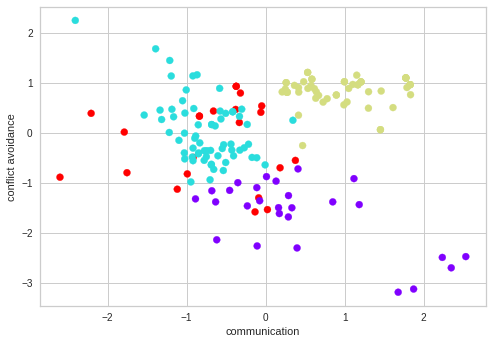

In [ ]:
from itertools import combinations
cols = ['share values','communication','conflict avoidance']
for x,y in combinations(cols,2):
  plt.scatter(x=data_k[x],y=data_k[y], c=data_k.k_means_cluster,cmap=plt.cm.get_cmap('rainbow', 4))
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

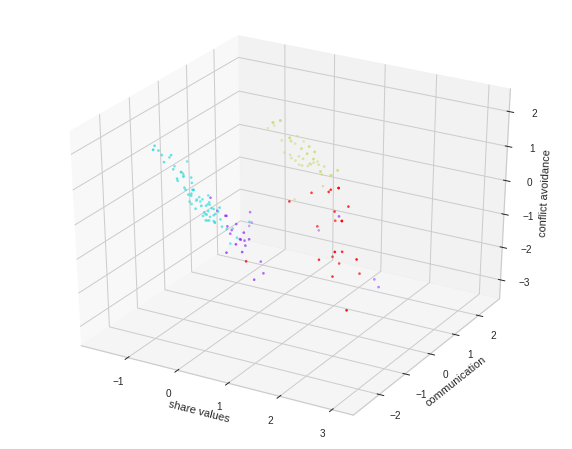

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_k['share values'], data_k['communication'], data_k['conflict avoidance'], s=5, c = data_k['k_means_cluster'],cmap=plt.cm.get_cmap('rainbow', 4))
ax.set_xlabel('share values', rotation=150)
ax.set_ylabel('communication')
ax.set_zlabel(r'conflict avoidance', rotation=60)
plt.show()

## Step 4. EDA/Interpretation

클러스터의 변수에따른 평균과 표준편자를 확인해보았다.

In [ ]:
# 군집별 통계
data_k.groupby('k_means_cluster').mean()

,share values,communication,conflict avoidance,k_silhouette_coeff
k_means_cluster,,,,
0,-0.278340,0.439058,-1.646484,0.331355
1,-0.776187,-0.758070,0.033965,0.571553
2,0.358040,0.971691,0.840211,0.586741
3,1.775061,-0.693861,-0.181738,0.397161


In [ ]:
data_k.groupby('k_means_cluster').std()

,share values,communication,conflict avoidance,k_silhouette_coeff
k_means_cluster,,,,
0,0.738828,0.972209,0.690422,0.113253
1,0.407757,0.413028,0.640038,0.098108
2,0.601836,0.536488,0.281335,0.105595
3,0.586242,0.791004,0.812996,0.121183


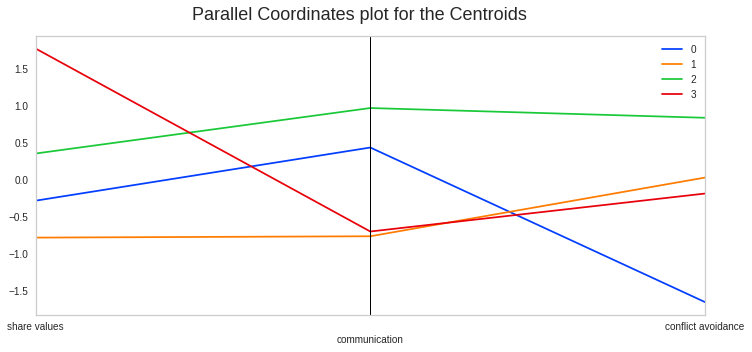

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 4)

위의 시각화로 데이터를 4개로 그룹화할 수 있다.

0. 중간 정도의 가치관 공유, 높은 커뮤니케이션 부적절성, 낮은 갈등 회피성
1. 낮은 가치관 공유, 낮은 커뮤니케이션 부적절성, 중간정도의 갈등회피성
2. 중간정도의 가치관 공유, 높은 커뮤니케이션 부적절성, 높은 갈등 회피성
3. 높은 가치관의 공유, 낮은 커뮤니케이션 부적절성, 중간정도의 갈등회피성

이러한 특성을 통해 그룹의 naming을 진행하였다.
0. 갈등이 잦으며 커뮤니케이션 방식이 부적절한 그룹
1. 가치관 공유도는 낮지만 커뮤니케이션의 방식은 적절한 그룹
2. 갈등 회피가 잦으며 커뮤니케이션 방식이 부적절한 그룹
3. 가치관을 공유하며 적절한 커뮤니케이션 방식을 보이는 그룹


그때의 분포는 아래와 같다.

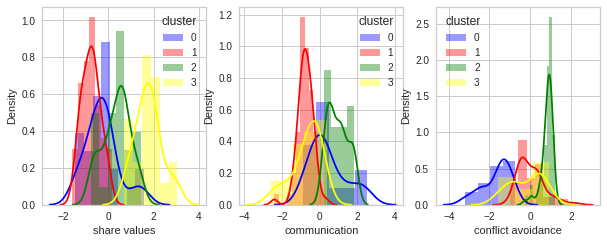

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
plt.subplot(2,3,1) 
sns.distplot(data_k[data_k.k_means_cluster == 0]["share values"], 
             color="blue", label=0)
sns.distplot(data_k[data_k.k_means_cluster == 1]["share values"], 
             color="red", label=1)
sns.distplot(data_k[data_k.k_means_cluster == 2]["share values"], 
             color="green", label=2)
sns.distplot(data_k[data_k.k_means_cluster == 3]["share values"], 
             color="yellow", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,2) 
sns.distplot(data_k[data_k.k_means_cluster == 0]["communication"], 
             color="blue", label=0)
sns.distplot(data_k[data_k.k_means_cluster == 1]["communication"], 
             color="red", label=1)
sns.distplot(data_k[data_k.k_means_cluster == 2]["communication"], 
             color="green", label=2)
sns.distplot(data_k[data_k.k_means_cluster == 3]["communication"], 
             color="yellow", label=3)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_k[data_k.k_means_cluster == 0]["conflict avoidance"], 
             color="blue", label=0)
sns.distplot(data_k[data_k.k_means_cluster == 1]["conflict avoidance"], 
             color="red", label=1)
sns.distplot(data_k[data_k.k_means_cluster == 2]["conflict avoidance"], 
             color="green", label=2)
sns.distplot(data_k[data_k.k_means_cluster == 3]["conflict avoidance"], 
             color="yellow", label=3)
plt.legend(title="cluster")

plt.show()

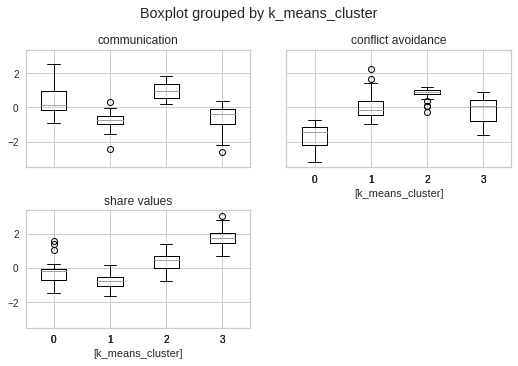

In [ ]:
# 시각화방법 2
data_k.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()